In [1]:
!git clone https://github.com/AusterweilLab/snafu-py
!git clone https://github.com/HNinou/MathTools_TD1
!pip install snafu-py/.

Cloning into 'snafu-py'...
remote: Enumerating objects: 5174, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 5174 (delta 49), reused 99 (delta 23), pack-reused 5036 (from 1)
Receiving objects: 100% (5174/5174), 34.42 MiB | 8.23 MiB/s, done.
Resolving deltas: 100% (2931/2931), done.
Cloning into 'MathTools_TD1'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 102.29 KiB | 1.42 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Processing ./snafu-py
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysnafu: filename=pysnafu-2.6-py3-none-any.whl size=46141 sha256=99ff87abf55da468d17017488a262c8be33ed31923362

In [2]:
import snafu
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns

# Antique coin collection

##7)
First consider N = 1000 coins originally produced with serial numbers ranging from 1 to N and k = 10 collected coins. Write a python program that would sample the serial number of each collected coin using the function np.random.choice(). From these serial numbers, compute the corresponding values of m, θ tilde and μ.

In [3]:
#Statistics of the sampling:

def coin_sampling_one_experiment(N, k):
  coin_sample = np.random.choice(range(N), size = k)
  m = max(coin_sample) #max of the sample
  theta_hat = m*(1+1/k)-1
  mu = (m-1)*(k-1)/(k-2)
  return(m, theta_hat, mu)

print(coin_sampling_one_experiment(N=1000, k=10))

(971, 1067.1000000000001, 1091.25)


## 8)
Repeat this experiment 10 000 times and store the results in the empty numpy arrays in the notebook. Fill in the code for plotting the empirical distributions and means of the estimators.

In [4]:
#Statistics of the sampling repeated 10 000 times:

def coin_sampling_10000_experiments(N,k):
  parameters_list = [coin_sampling_one_experiment(N,k) for i in range(10000)] # size 3 x 10 0000

  m_list = [para[0] for para in parameters_list]
  theta_hat_list = [para[1] for para in parameters_list]
  mu_list = [para[2] for para in parameters_list]

  theta_mean = np.mean(theta_hat_list)
  mu_mean = np.mean(mu_list)
  m_mean = np.mean(m_list)

  return(m_list, theta_hat_list, mu_list)

m_list, theta_hat_list, mu_list = coin_sampling_10000_experiments(N=1000, k=10)


theta_mean = np.mean(theta_hat_list)
mu_mean = np.mean(mu_list)
m_mean = np.mean(m_list)

# k=10 , N = 1000

### You can modify the code below to plot your data or write your own

In [5]:
# Creating histograms for both distributions
fig = go.Figure()


# Plot for theta_list
fig.add_trace(go.Histogram(x=coin_sampling_10000_experiments(1000,10)[1], name='Theta Distribution', opacity=0.75, histnorm = 'percent'))

# Plot for mu_list
fig.add_trace(go.Histogram(x=coin_sampling_10000_experiments(1000,10)[2], name='Theta Distribution', opacity=0.75, histnorm = 'percent'))

# Plot for m_list
fig.add_trace(go.Histogram(x=coin_sampling_10000_experiments(1000,10)[0], name='Theta Distribution', opacity=0.75, histnorm = 'percent'))

# Add vertical lines for the mean values
fig.add_vline(x=theta_mean, line=dict(color='blue', dash='dash'), annotation_text='Theta Mean', annotation_position="top left")
fig.add_vline(x=mu_mean, line=dict(color='red', dash='dash'), annotation_text='Mu Mean', annotation_position="top right")
fig.add_vline(x=m_mean, line=dict(color='green', dash='dash'), annotation_text='m Mean', annotation_position="top right")

# Update layout
fig.update_layout(
    title="Distributions of Theta and Mu",
    xaxis_title="Values",
    yaxis_title="Count",
    barmode='overlay',
    bargap=0.1
)

# Show the plot
fig.show()


## 9)
We would now like to vizualize how these empirical estimator distributions change with regard to the problem parameter *k*. Repeat the previous experiment for 20 values of *k* ranging from 3 to 2000 tat you will store in the array "k_list", store the results in the empty numpy arrays.

In [6]:
# Write your code here

num_ks = 20
nb_samples = 10000

N = 1000
k_list = np.linspace(3,200, num = 20) #np.random.choice() si jamais puis ordonner!!!!!!!!! retrouver sur photo


parameters_for_different_k = np.array([coin_sampling_10000_experiments(N=1000, k=int(i)) for i in k_list])

m_list = np.array([para[0] for para in parameters_for_different_k])
theta_hat_list = np.array([para[1] for para in parameters_for_different_k])
mu_list = np.array([para[2] for para in parameters_for_different_k])

print(parameters_for_different_k.shape) #for me
print(np.array(m_list).shape) #for me
print(m_list)


(20, 3, 10000)
(20, 10000)
[[994. 576. 783. ... 665. 908. 846.]
 [641. 943. 912. ... 827. 899. 965.]
 [773. 963. 987. ... 958. 972. 990.]
 ...
 [998. 996. 999. ... 996. 993. 996.]
 [999. 993. 991. ... 995. 997. 997.]
 [989. 993. 998. ... 996. 997. 993.]]


## 10)
### You can modify the code below to plot your data or write your own

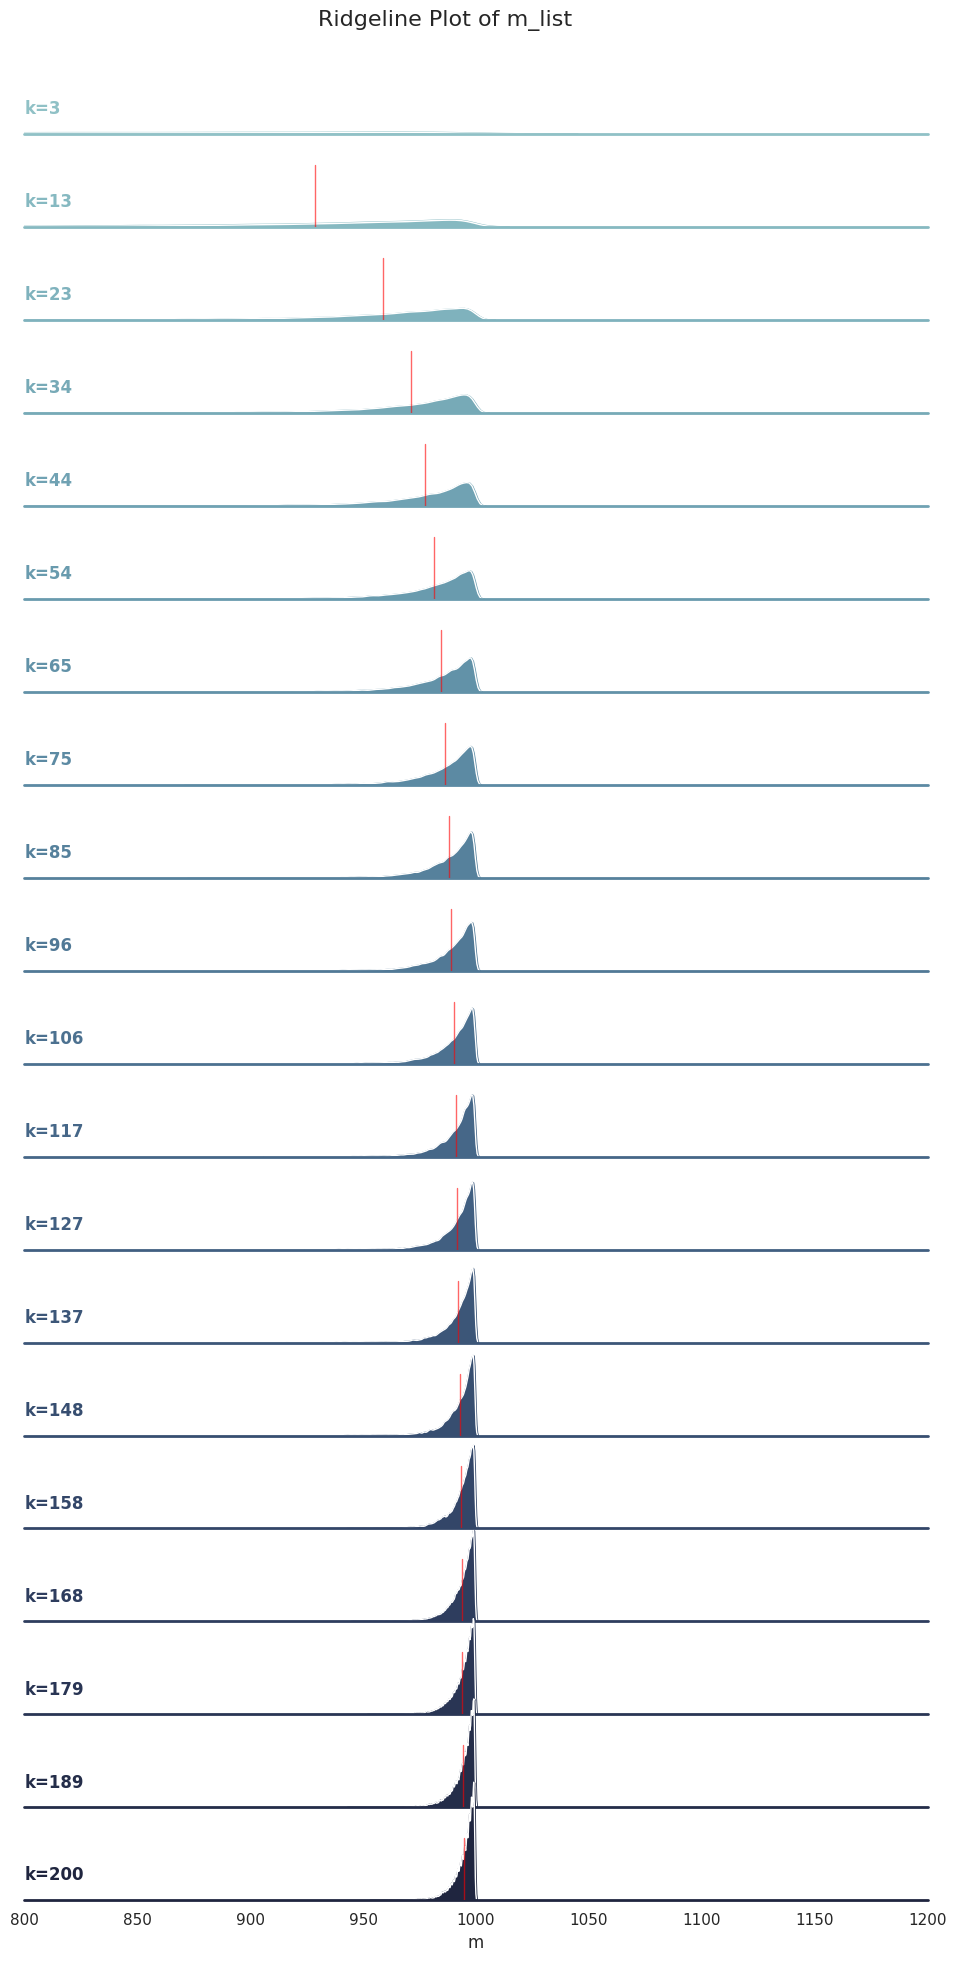

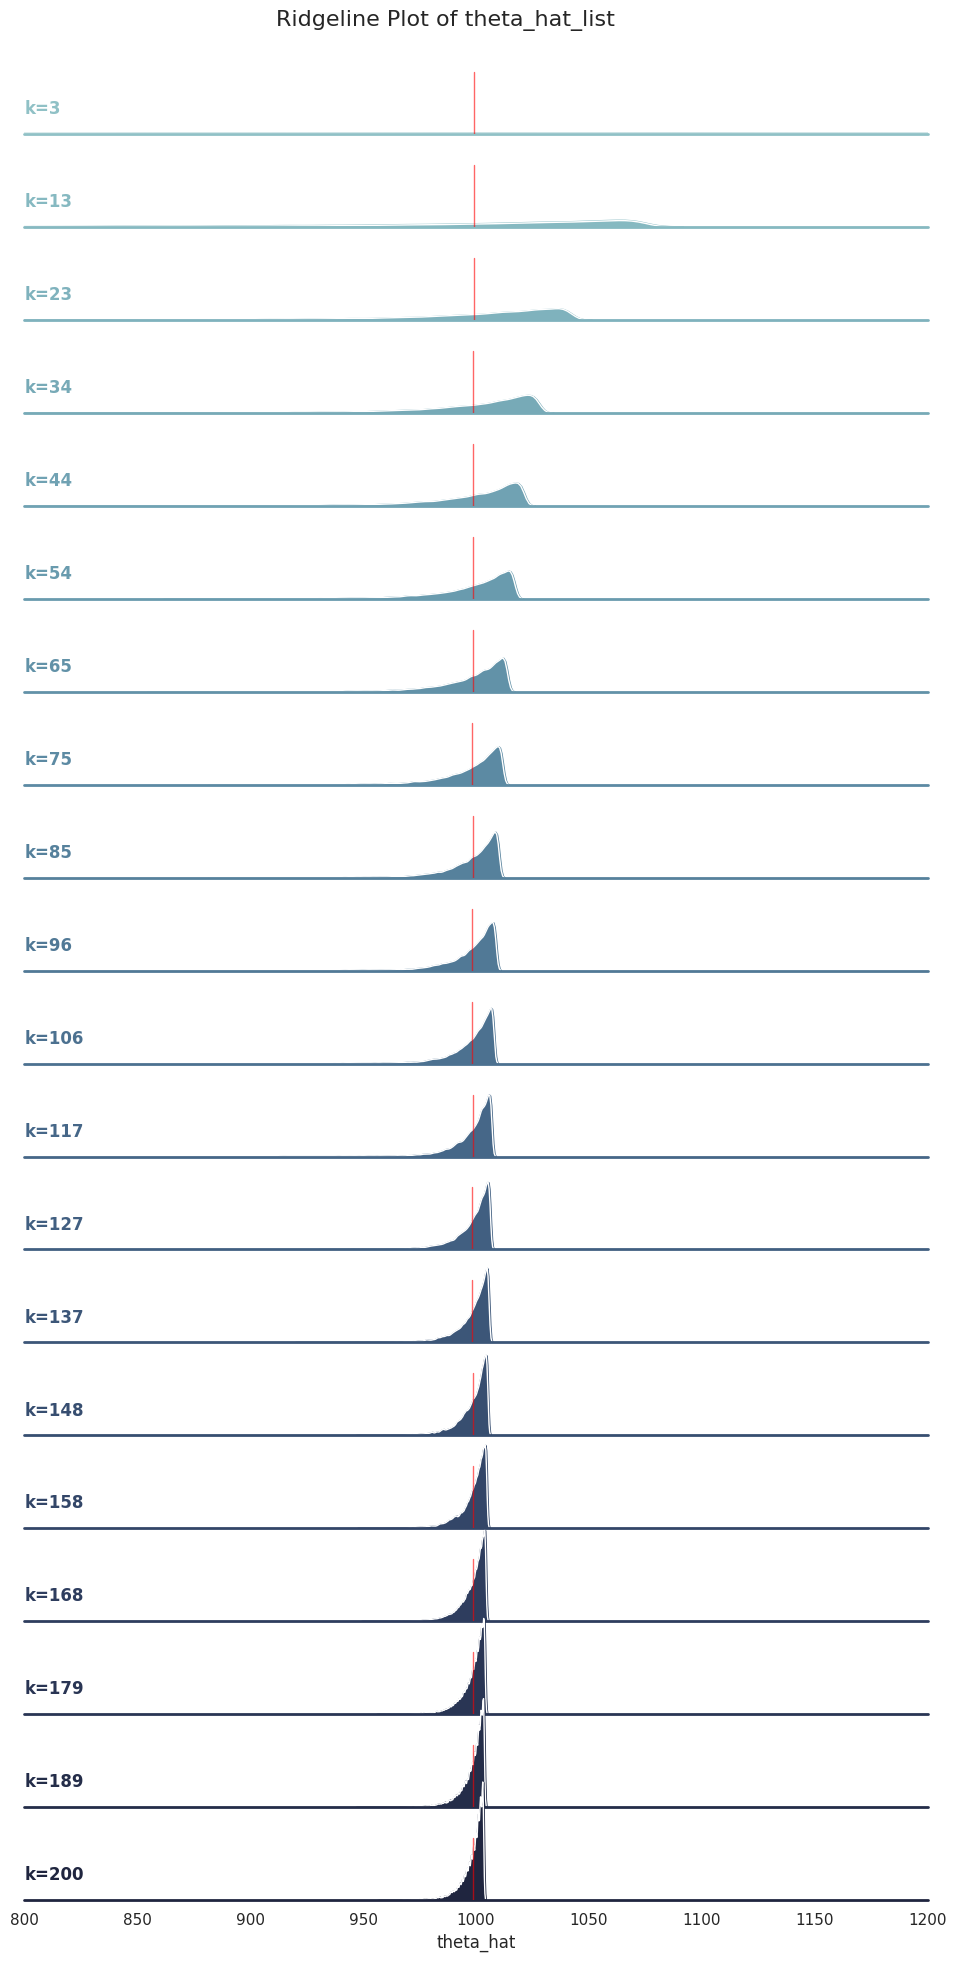

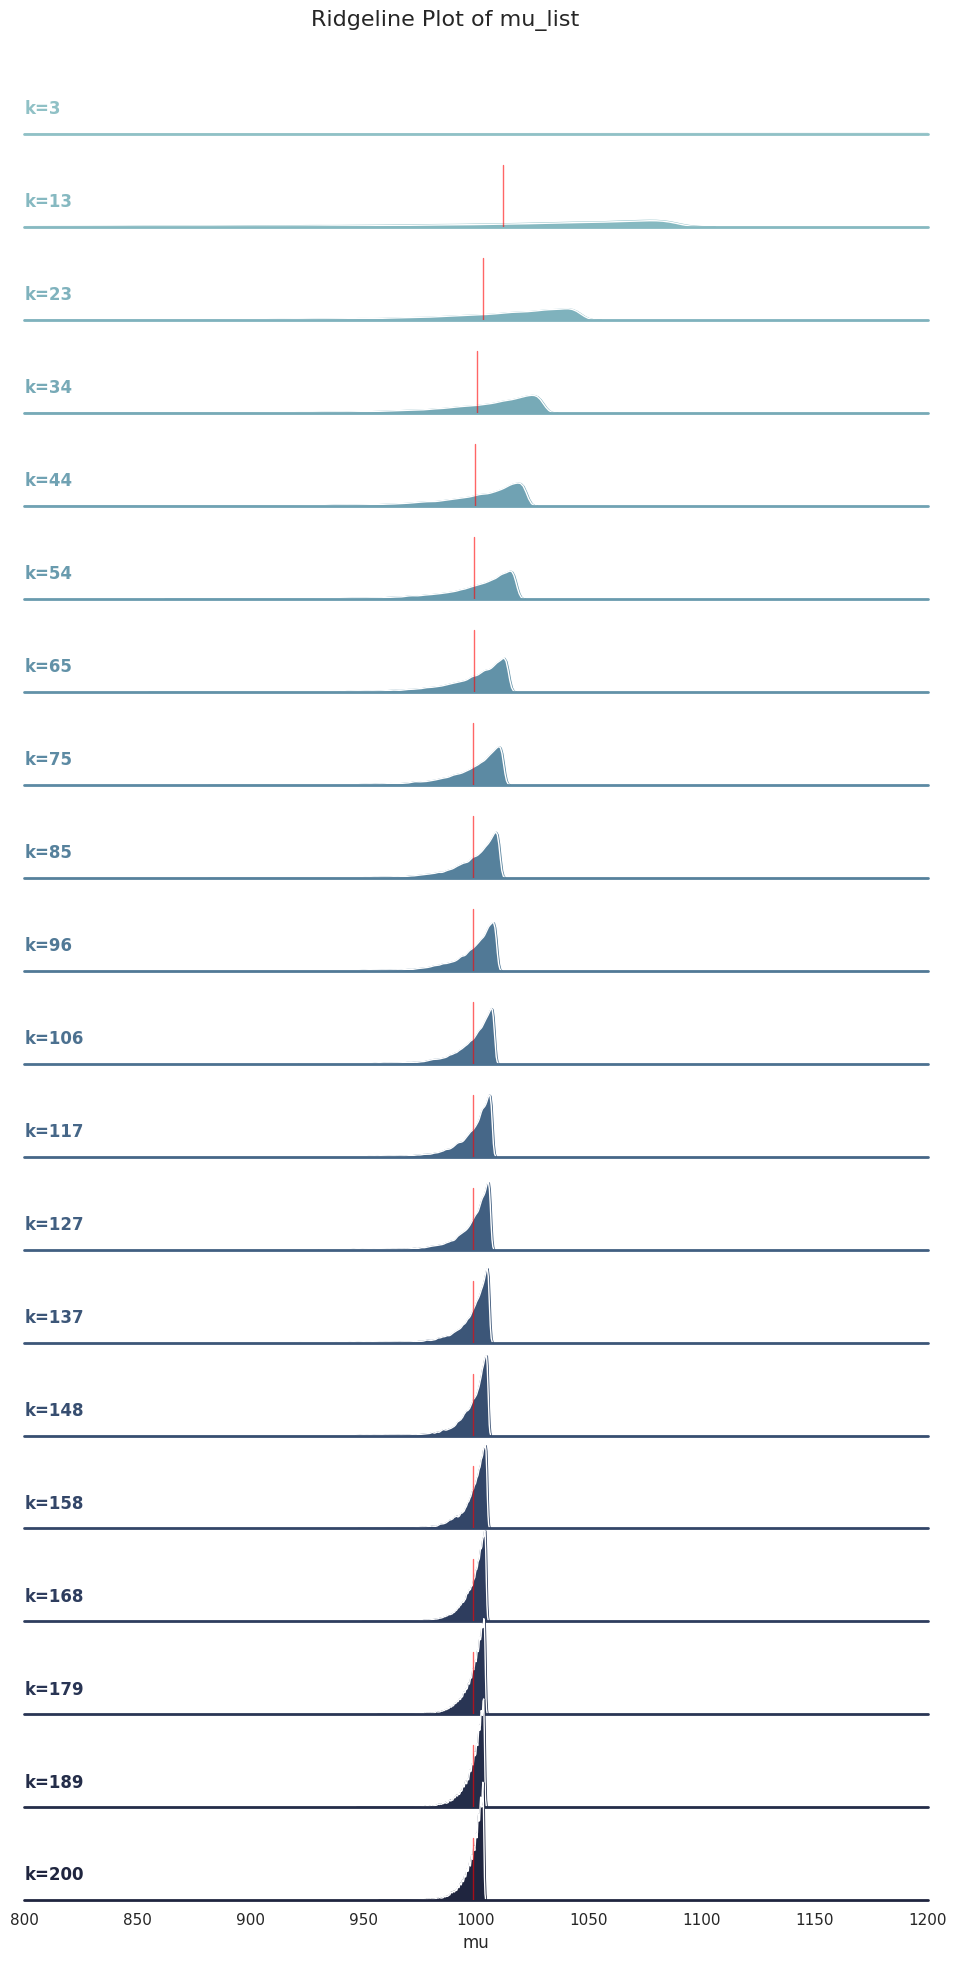

In [7]:
# Set the theme for the plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Function to create a dataframe for each array (m_list, theta_hat_list, mu_list)
def create_dataframe(array, name):
    df = pd.DataFrame(array.T, columns=[f'k={int(k_list[i])}' for i in range(num_ks)])
    df_melted = df.melt(var_name='k', value_name=name)
    return df_melted


# Create dataframes for each list
m_df = create_dataframe(m_list, 'm')
theta_hat_df = create_dataframe(theta_hat_list, 'theta_hat')
mu_df = create_dataframe(mu_list, 'mu')


# Function to calculate and plot vertical line at the mean of each distribution
def add_mean_line(data, **kwargs):
    mean_value = data.mean()
    plt.axvline(x=mean_value, color='red', alpha = 0.6, linestyle='-', lw=1, ymax = 0.5)


# Function to create ridgeline plot with FacetGrid
def ridgeline_plot(data, var_name, title):
    # Define the color palette
    pal = sns.cubehelix_palette(num_ks, rot=-.25, light=.7)

    # Initialize the FacetGrid object
    g = sns.FacetGrid(data, row="k", hue="k", aspect=10, height=1, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, var_name,
          bw_adjust=.5, clip_on=(800,1200),
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, var_name, clip_on=(800,1200), color="w", lw=1, bw_adjust=.5)

    # Add a reference line for better visualization
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Add vertical lines for the mean of each distribution
    g.map(add_mean_line, var_name)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, var_name)
    g.set(xlim=(800,1200))
    # Set the subplots to overlap and adjust spacing
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    plt.suptitle(title, fontsize=16)
    plt.show()

# Ridgeline plot for m_list
ridgeline_plot(m_df, 'm', 'Ridgeline Plot of m_list')

# Ridgeline plot for theta_hat_list
ridgeline_plot(theta_hat_df, 'theta_hat', 'Ridgeline Plot of theta_hat_list')

# Ridgeline plot for mu_list
ridgeline_plot(mu_df, 'mu', 'Ridgeline Plot of mu_list')


# Analyzing knowledge retrieval impairments associated with Alzheimer's disease

Run the cell below to retrieve the data.

In [8]:
fluencydata_NC = snafu.load_fluency_data("MathTools_TD1/ucsd_fluency.csv", category='animals',
                                      removeNonAlphaChars = True,
                                      spell = 'snafu-py/spellfiles/animals_snafu_spellfile.csv',
                                      group = ['NC'],
                                      hierarchical = True,
                                      removeIntrusions = True, scheme = 'snafu-py/schemes/animals_snafu_scheme.csv',
                                      removePerseverations = True)

fluencydata_PAD = snafu.load_fluency_data("MathTools_TD1/ucsd_fluency.csv", category='animals',
                                      removeNonAlphaChars = True,
                                      spell = 'snafu-py/spellfiles/animals_snafu_spellfile.csv',
                                      group = ['ProbAD'],
                                      hierarchical = True,
                                      removeIntrusions = True, scheme = 'snafu-py/schemes/animals_snafu_scheme.csv',
                                      removePerseverations = True)

The cell below shows the two fluency lists that were acquired from patient 0 in group NC

In [9]:
fluencydata_NC.labeledlists[2]

[['cat',
  'dog',
  'pigeon',
  'peacock',
  'lion',
  'tiger',
  'aardvark',
  'hippopotamus',
  'camel',
  'giraffe',
  'panther',
  'polarbear',
  'penguin',
  'koala',
  'condor',
  'elephant',
  'bobcat',
  'cheetah',
  'monkey',
  'raccoon',
  'chimpanzee'],
 ['cat',
  'dog',
  'elephant',
  'tortoise',
  'rhinoceros',
  'bird',
  'giraffe',
  'lion',
  'hippopotamus',
  'tiger',
  'snake',
  'finch',
  'swallow',
  'condor',
  'horse',
  'pony',
  'mule',
  'donkey',
  'frog',
  'fish',
  'guppy',
  'tadpole',
  'eagle'],
 ['penguin',
  'pelican',
  'seal',
  'otter',
  'whale',
  'sealion',
  'lion',
  'porpoise',
  'cat',
  'dog',
  'bird',
  'bear',
  'giraffe',
  'elephant',
  'hippopotamus',
  'walrus',
  'muskrat',
  'beaver',
  'moose',
  'horse',
  'pony',
  'cougar',
  'mouse'],
 ['dog',
  'cat',
  'rat',
  'hamster',
  'mink',
  'possum',
  'lion',
  'tiger',
  'elephant',
  'hippopotamus',
  'giraffe',
  'ox',
  'cow'],
 ['dog',
  'cat',
  'tiger',
  'lion',
  'zebra'

In [10]:
fluencydata_PAD.labeledlists[1]

[['dog', 'cat', 'steer', 'cow', 'lion', 'tiger', 'buffalo', 'camel'],
 ['cat', 'dog', 'mouse', 'lion', 'elephant', 'tiger', 'sheep', 'porcupine'],
 ['lion', 'dog', 'cat', 'squirrel', 'skunk']]

The cell below shows the same data but the animal names have been replaced by their associated integers

In [11]:
fluencydata_NC.lists[0]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 7, 18, 5, 4, 19, 20]]

The animal name -> integer mapping can be seen using the code below

In [12]:
fluencydata_NC.items[0]

{0: 'cow',
 1: 'sheep',
 2: 'dog',
 3: 'cat',
 4: 'monkey',
 5: 'zebra',
 6: 'horse',
 7: 'tiger',
 8: 'alligator',
 9: 'buffalo',
 10: 'aardvark',
 11: 'fox',
 12: 'wolf',
 13: 'coyote',
 14: 'possum',
 15: 'skunk',
 16: 'squirrel',
 17: 'lion',
 18: 'elephant',
 19: 'hippopotamus',
 20: 'raccoon'}

## 1)
Compute the total number of patients, lists and items for both groups, comment the results.

In [13]:
# Answer for the NC group.

########## NC GROUP ##########

# nb_NC computes the total number of patients for the NC group.
def nb_NC(i=0):
  for patients in fluencydata_NC.lists:
    i = i+1
  return(i)

# nb_lists_nc computes the total number of lists for the NC group.
def nb_lists_nc(i=0):
  for patients in fluencydata_NC.lists:
    for lists in patients:
      i = i+1
  return(i)

# nb_items_nc computes the total number of items for the NC group.
def nb_items_nc(i=0):
  for patients in fluencydata_NC.items:
    for items in patients:
      i = i+1
  return(i)

nb_NC = nb_NC()
nb_lists_nc = nb_lists_nc()
nb_items_nc = nb_items_nc()


print('Total number of patients for the NC group: ' + str(nb_NC) + '.')
print('Total number of lists for the NC group: ' + str(nb_lists_nc) + '.')
print('Total number of items for the NC group: ' + str(nb_items_nc) + '.')

Total number of patients for the NC group: 97.
Total number of lists for the NC group: 821.
Total number of items for the NC group: 5747.


In [14]:
# Answer for the PAD group.

########## PAD GROUP ##########

# nb_PAD computes the total number of patients for the PAD group.
def nb_PAD(i=0):
  for patients in fluencydata_PAD.lists:
    i = i+1
  return(i)

# nb_lists_pad computes the total number of lists for the PAD group.
def nb_lists_pad(i=0):
  for patients in fluencydata_PAD.lists:
    for lists in patients:
      i = i+1
  return(i)

# nb_items_pad computes the total number of items for the PAD group.
def nb_items_pad(i=0):
  for patients in fluencydata_PAD.items:
    for items in patients:
      i = i+1
  return(i)

nb_PAD = nb_PAD()
nb_lists_pad = nb_lists_pad()
nb_items_pad = nb_items_pad()

print('Total number of patients for the PAD group: ' + str(nb_PAD) + '.')
print('Total number of lists for the PAD group: ' + str(nb_lists_pad) + '.')
print('Total number of items for the PAD group: ' + str(nb_items_pad) + '.')

Total number of patients for the PAD group: 61.
Total number of lists for the PAD group: 282.
Total number of items for the PAD group: 1555.


### An estimated network is represented as a symmetrical matrix of zeroes and ones. Each row or column in the matrix represents a concept. A value of one in the matrix denotes an edge between two concepts, while zero denotes no edge.

The cell below computes the semantic network associated to patient 2 in the NC group.

In [15]:
naive_network = snafu.naiveRandomWalk(fluencydata_NC.lists[2])

In [16]:
fig = px.imshow(naive_network,
                labels=dict(x="X-axis", y="Y-axis", color="Values"),
                title="Adjacency Matrix")
fig.update_layout(
    width=500,  # Set the width of the plot
    height=500  # Set the height of the plot
)

# Show the plot
fig.show()

### The cell below shows the graph representation of the semantic network computed above.

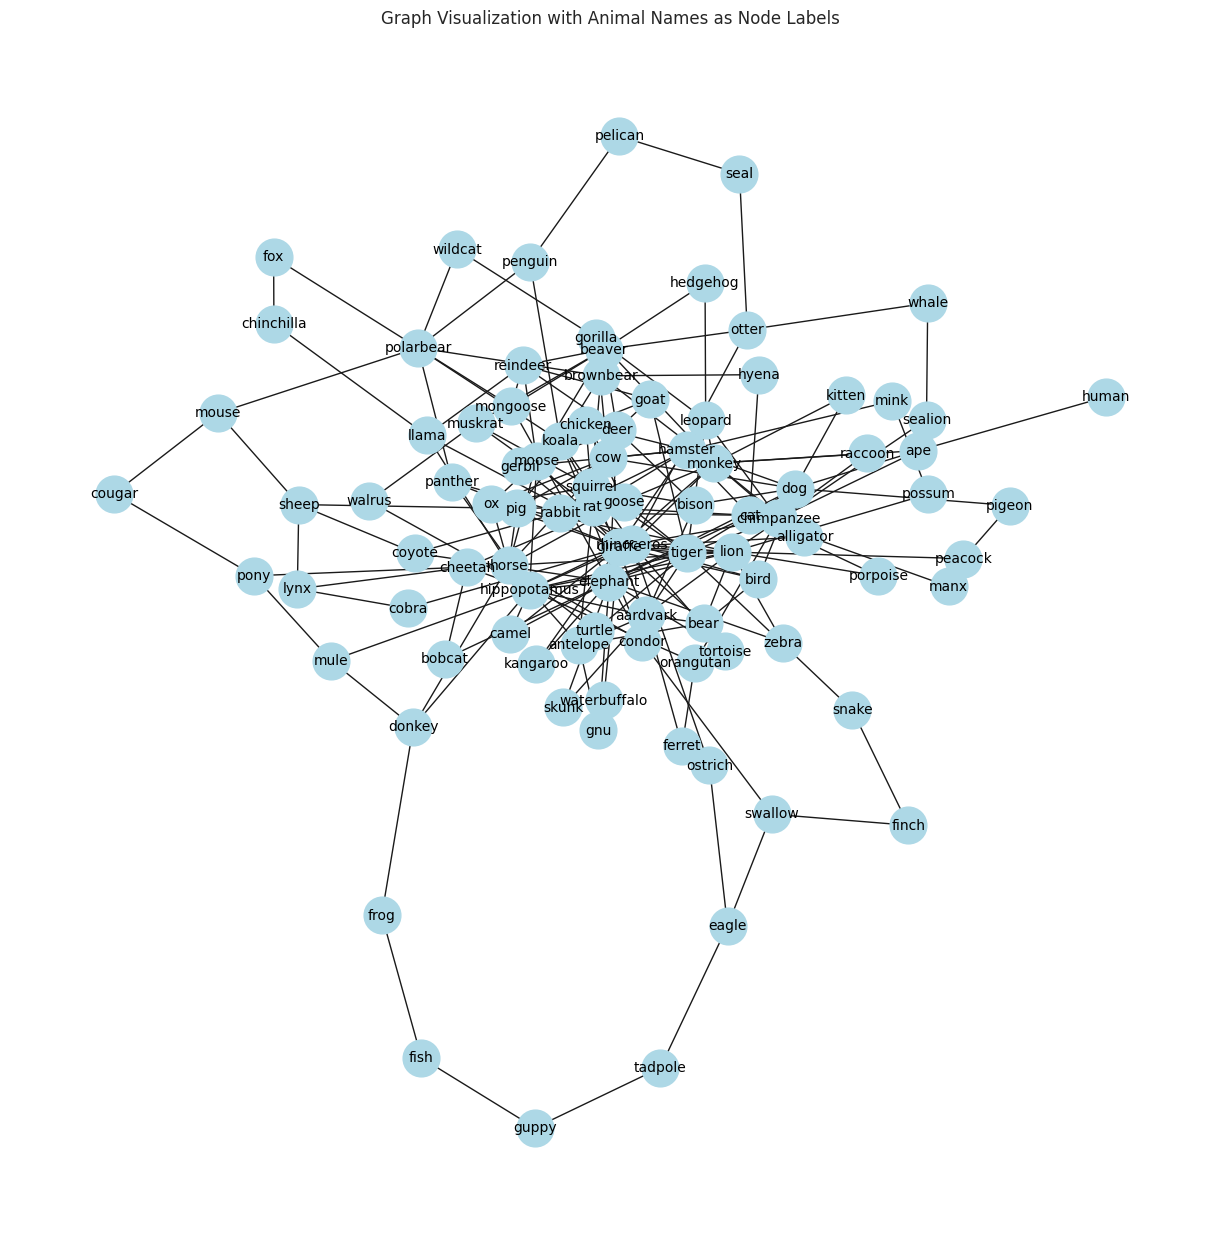

In [17]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(naive_network)

# Set node labels using the animal names
node_labels = fluencydata_NC.items[2]

# Get positions for the nodes (spring layout)
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=False, node_color='lightblue', font_weight='bold', node_size=700)

# Draw labels (animal names) at the node positions
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')

# Set plot title
plt.title("Graph Visualization with Animal Names as Node Labels")

# Show the plot
plt.show()

The cells below shows how to retrieve the properties of a graph G using the networkx library

In [18]:
nx.average_shortest_path_length(G)

3.1443605582246628

In [19]:
nx.diameter(G)

7

In [20]:
nx.number_of_nodes(G)

94

In [21]:
nx.number_of_edges(G)

214

In [22]:
nodedegree = (nx.number_of_edges(G)*2)/nx.number_of_nodes(G)
nodedegree

4.553191489361702

##2)
Compute and store in a list the adjacency matrix for each of the patients of both groups.

In [23]:
#Adjadency matrix stored in a list for each group of patients:

#Adjacency matrix for NC patients:
matrix_networks_nc = [snafu.naiveRandomWalk(P) for P in fluencydata_NC.lists]

#Adjacency matrix for PAD patients:
matrix_networks_pad = [snafu.naiveRandomWalk(P) for P in fluencydata_PAD.lists]


## 3)
For each of semantic network associated to a given patient, compute and store the average shortest path lengths, diameters, number of nodes and number of edges and plot their distributions and means. What difference do you see between the NC and PAD groups?

In [24]:
# For each of semantic network associated to a given patient, computation and storage of
# the average shortest path lengths, diameters, number of nodes and number of edges.

########## NC GROUP ##########

#List of the graph of each patient of NC group:

networks_nc = [nx.from_numpy_array(M) for M in matrix_networks_nc]

# For all the semantic networks associated to each NC patient, computation and storage of the four parameters in a list of length nb_NC (=97):

aspl_nc = [nx.average_shortest_path_length(G) for G in networks_nc]
diameter_nc = [nx.diameter(G) for G in networks_nc]
number_of_nodes_nc = [nx.number_of_nodes(G) for G in networks_nc]
number_of_edges_nc = [nx.number_of_edges(G) for G in networks_nc]

# Mean of these four parameters for the NC group:

mean_aspl_nc = np.mean(np.array(aspl_nc))
mean_diameter_nc = np.mean(np.array(diameter_nc))
mean_nodes_nc = np.mean(np.array(number_of_nodes_nc))
mean_edges_nc = np.mean(np.array(number_of_edges_nc))


#À RETIRER QUAND FINI
print(mean_aspl_nc, mean_diameter_nc, mean_nodes_nc, mean_edges_nc) #for me

3.76495299135124 9.556701030927835 59.24742268041237 113.69072164948453


In [25]:
########## PAD GROUP ##########

# As far as some graphs associated to some semantic networks of some patients are not connected,
# I define a function main_graph(g) to retrieve the largest connected subgraph if the original graph is not fully connected
# (otherwise the four parameters can't be computed):

def main_graph(g):
  if nx.is_connected(g) == False:
    connected_components = nx.connected_components(g)
    largest_graph = max(connected_components, key=len)
    main_graph = g.subgraph(largest_graph)
    return main_graph
  else:
    return g

#List of the graph of each patient of PAD group:

networks_pad = [main_graph(nx.from_numpy_array(M)) for M in matrix_networks_pad]

# For all the semantic networks associated to each PAD patient, computation and storage of the four parameters in a list of length nb_PAD (=61):

aspl_pad = [nx.average_shortest_path_length(G) for G in networks_pad]
diameter_pad = [nx.diameter(G) for G in networks_pad]
number_of_nodes_pad = [nx.number_of_nodes(G) for G in networks_pad]
number_of_edges_pad = [nx.number_of_edges(G) for G in networks_pad]

# Mean of these four parameters for the PAD group:

mean_aspl_pad = np.mean(np.array(aspl_pad))
mean_diameter_pad = np.mean(np.array(diameter_pad))
mean_nodes_pad = np.mean(np.array(number_of_nodes_pad))
mean_edges_pad = np.mean(np.array(number_of_edges_pad))

#À RETIRER QUAND FINI
print(mean_aspl_pad, mean_diameter_pad, mean_nodes_pad, mean_edges_pad) #for me

3.465873062453795 8.229508196721312 25.360655737704917 36.131147540983605


You can use the numpy function np.nanmean() to compute the mean of a numpy array that will disregard the "NaN"s in it.  

### You can modify the code below to plot your data or write your own

In [26]:
# Plot of the distributions and means of the four parameters for NC group:

# Create a 2x2 subplot grid
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Average Shortest Path Length", "Diameter", "Number of Nodes", "Number of Edges"))

# Histogram for aspl_nc
fig.add_trace(go.Histogram(x=aspl_nc, name="Average Shortest Path Length"), row=1, col=1)
# Add mean line for aspl_nc
fig.add_trace(go.Scatter(x=[mean_aspl_nc, mean_aspl_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean ASPL"), row=1, col=1)

# Histogram for diameter_nc
fig.add_trace(go.Histogram(x=diameter_nc, name="Diameter"), row=1, col=2)
# Add mean line for diameter_nc
fig.add_trace(go.Scatter(x=[mean_diameter_nc, mean_diameter_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Diameter"), row=1, col=2)

# Histogram for number_of_nodes_nc
fig.add_trace(go.Histogram(x=number_of_nodes_nc, name="Number of Nodes"), row=2, col=1)
# Add mean line for number_of_nodes_nc
fig.add_trace(go.Scatter(x=[mean_nodes_nc, mean_nodes_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Nodes"), row=2, col=1)

# Histogram for number_of_edges_nc
fig.add_trace(go.Histogram(x=number_of_edges_nc, name="Number of Edges"), row=2, col=2)
# Add mean line for number_of_edges_nc
fig.add_trace(go.Scatter(x=[mean_edges_nc, mean_edges_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Edges"), row=2, col=2)

# Update layout with title and axis labels
fig.update_layout(
    title="Histograms of Network Quantities - NC",
    height=600, width=800,  # Customize figure size
    showlegend=False,  # Hides individual legends
)

# Update x-axis and y-axis titles for each subplot
fig.update_xaxes(title_text="Average Shortest Path Length", row=1, col=1)
fig.update_xaxes(title_text="Diameter", row=1, col=2)
fig.update_xaxes(title_text="Number of Nodes", row=2, col=1)
fig.update_xaxes(title_text="Number of Edges", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the figure
fig.show()


### You can modify the code below to plot your data or write your own

In [27]:
# Plot of the distributions and means of the four parameters for PAD group:

# Create a 2x2 subplot grid
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Average Shortest Path Length", "Diameter", "Number of Nodes", "Number of Edges"))

# Histogram for aspl_pad
fig.add_trace(go.Histogram(x=aspl_pad, name="Average Shortest Path Length"), row=1, col=1)
# Add mean line for aspl_pad
fig.add_trace(go.Scatter(x=[mean_aspl_pad, mean_aspl_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean ASPL"), row=1, col=1)

# Histogram for diameter_pad
fig.add_trace(go.Histogram(x=diameter_pad, name="Diameter"), row=1, col=2)
# Add mean line for diameter_pad
fig.add_trace(go.Scatter(x=[mean_diameter_pad, mean_diameter_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Diameter"), row=1, col=2)

# Histogram for number_of_nodes_pad
fig.add_trace(go.Histogram(x=number_of_nodes_pad, name="Number of Nodes"), row=2, col=1)
# Add mean line for number_of_nodes_pad
fig.add_trace(go.Scatter(x=[mean_nodes_pad, mean_nodes_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Nodes"), row=2, col=1)

# Histogram for number_of_edges_pad
fig.add_trace(go.Histogram(x=number_of_edges_pad, name="Number of Edges"), row=2, col=2)
# Add mean line for number_of_edges_pad
fig.add_trace(go.Scatter(x=[mean_edges_pad, mean_edges_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Edges"), row=2, col=2)

# Update layout with title and axis labels
fig.update_layout(
    title="Histograms of Network Quantities - PAD",
    height=600, width=800,  # Customize figure size
    showlegend=False,  # Hides individual legends
)

# Update x-axis and y-axis titles for each subplot
fig.update_xaxes(title_text="Average Shortest Path Length", row=1, col=1)
fig.update_xaxes(title_text="Diameter", row=1, col=2)
fig.update_xaxes(title_text="Number of Nodes", row=2, col=1)
fig.update_xaxes(title_text="Number of Edges", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the figure
fig.show()


## 5)
Write a python code for randomly permuting elements of each fluency list.

In [28]:
import copy

# Python code for randomly permuting elements of each fluency list (takes fluency_data as argument):

def generate_permuted_flists(fluency_data):
  new_fluency_data = copy.deepcopy(fluency_data)
  for patient in range(len(new_fluency_data.lists)): # loop over all patients
    nb_of_lists_per_patient = len(new_fluency_data.lists[patient])
    for list in range(nb_of_lists_per_patient): # loop over all lists per patient
      new_fluency_data.lists[patient][list]=np.random.permutation(new_fluency_data.lists[patient][list])
  return new_fluency_data

permuted_NC = generate_permuted_flists(fluencydata_NC) #DO WE NEED THAT?
permuted_PAD = generate_permuted_flists(fluencydata_PAD)

## 6)
Show the permuted list for the first patient in the PAD group and compare it to the original data.

In [29]:
print('original list for the first patient in the PAD group (original data):')
print(fluencydata_PAD.lists[0])
print('permuted list for the first patient in the PAD group:')
print(generate_permuted_flists(fluencydata_PAD).lists[0])

original list for the first patient in the PAD group (original data):
[[0, 1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 3, 2, 6, 5, 7, 12]]
permuted list for the first patient in the PAD group:
[array([5, 3, 7, 8, 6, 1, 0, 4, 2]), array([11,  2,  9, 10,  6,  5,  7, 12,  3])]


## 7)
For each patient, compute and store the ASPL, diameters, numbers of nodes and numbers of edges for 50 iterations of the permutation procedure.

In [30]:
########## NC GROUP ##########

nb_samples = 50

#List of the graph of each patient of NC group:
#networks_nc = [nx.from_numpy_array(snafu.naiveRandomWalk(P)) for P in fluencydata_NC.lists]

#Empty lists of the 4 parameters to fill.
#They will be lists of lists : nb_samples (=50) lists (50 iterations of the permutation procedure) of lists of nb_NC (=97) NC patients:

aspl_nc_permuted = []
diameter_nc_permuted = []
number_of_nodes_nc_permuted = []
number_of_edges_nc_permuted = []

#Store the empty lists sample by sample, with lists of the parameter of a permutation of the fluency lists of each NC patient:

for i in range(nb_samples):

  #List of the graph of each patient of NC group (permuted):
  networks_nc_permuted = [nx.from_numpy_array(snafu.naiveRandomWalk(P)) for P in generate_permuted_flists(fluencydata_NC).lists]

  aspl_nc_permuted.append([nx.average_shortest_path_length(G) for G in networks_nc_permuted])
  diameter_nc_permuted.append([nx.diameter(G) for G in networks_nc_permuted])
  number_of_nodes_nc_permuted.append([nx.number_of_nodes(G) for G in networks_nc_permuted])
  number_of_edges_nc_permuted.append([nx.number_of_edges(G) for G in networks_nc_permuted])
  #Each of these four lists is made of 50 lists of 97-lists (in an array, 50 lines x 97 columns).

#To have also simpler lists that, for a given parameter, contains the mean of the parameter among the NC patients for each sample:
aspl_nc_permuted_mean = [np.nanmean(i) for i in np.array(aspl_nc_permuted)]
diameter_nc_permuted_mean = [np.nanmean(i) for i in np.array(diameter_nc_permuted)]
number_of_nodes_nc_permuted_mean = [np.nanmean(i) for i in np.array(number_of_nodes_nc_permuted)]
number_of_edges_nc_permuted_mean = [np.nanmean(i) for i in np.array(number_of_edges_nc_permuted)]
#Each of these four lists has a lenght of 50, one integer (mean for the parameter among the NC patients) for each sample.

In [31]:
########## PAD GROUP ##########

nb_samples = 50

#List of the graph of each patient of PAD group:
networks_pad = [main_graph(nx.from_numpy_array(snafu.naiveRandomWalk(P))) for P in fluencydata_PAD.lists] #List of the graph of each patient of PAD group

#Empty lists of the 4 parameters to fill.
#They will be lists of lists : nb_samples (=50) lists (50 iterations of the permutation procedure) of lists of nb_PAD (=61) PAD patients:

aspl_pad_permuted = []
diameter_pad_permuted = []
number_of_nodes_pad_permuted = []
number_of_edges_pad_permuted = []

#Store the empty lists sample by sample, with lists of the parameter of a permutation of the fluency lists of each NC patient:

for i in range(nb_samples):

  #List of the graph of each patient of NC group (permuted):
  networks_pad_permuted = [main_graph(nx.from_numpy_array(snafu.naiveRandomWalk(P))) for P in generate_permuted_flists(fluencydata_PAD).lists]

  aspl_pad_permuted.append([nx.average_shortest_path_length(G) for G in networks_pad_permuted])
  diameter_pad_permuted.append([nx.diameter(G) for G in networks_pad_permuted])
  number_of_nodes_pad_permuted.append([nx.number_of_nodes(G) for G in networks_pad_permuted])
  number_of_edges_pad_permuted.append([nx.number_of_edges(G) for G in networks_pad_permuted])
  #Each of these four lists is made of 50 lists of 97-lists (in an array, 50 lines x 97 columns).

#To have also simpler lists that, for a given parameter, contains the mean of the parameter among the NC patients for each sample:
aspl_pad_permuted_mean = [np.nanmean(i) for i in np.array(aspl_pad_permuted)]
diameter_pad_permuted_mean = [np.nanmean(i) for i in np.array(diameter_pad_permuted)]
number_of_nodes_pad_permuted_mean = [np.nanmean(i) for i in np.array(number_of_nodes_pad_permuted)]
number_of_edges_pad_permuted_mean = [np.nanmean(i) for i in np.array(number_of_edges_pad_permuted)]
#Each of these four lists has a lenght of 50, one integer (mean for the parameter among the NC patients) for each sample.

##8)
For both groups, compare the mean of the difference between the ASPL of the real data and that of the mock networks.

In [32]:
########## NC GROUP ##########

def mean_difference_nc():
  original_aspl_nc = np.array(aspl_nc) #array of the nb_NC(=97) original aspl for each of the NC patients
  difference_nc = np.zeros(len(aspl_nc)) #zeros-array of length 97
  #loop over each of the nb_samples(=50) samples (permutations), being a list of the nb_NC(=97) aspl associated to the semantic network of each NC patient:
  for sample in aspl_nc_permuted:
    #sum over the nb_samples(=50) of the differences between the original aspl of the nb_NC(=97) patients and the aspl of one of the nb_samples(=50) mock networks of each NC patient:
    difference_nc = difference_nc + original_aspl_nc - np.array(sample)
  mean_difference_nc = difference_nc/nb_samples
  return mean_difference_nc

mean_difference_nc = mean_difference_nc() #list of length nb_NC(=97)
average_mean_difference_nc = np.nanmean(mean_difference_nc)
print('mean of the difference between the ASPL of the real data and that of the mock networks for the NC patients:')
print(mean_difference_nc)


########## PAD GROUP ##########

def mean_difference_pad():
  original_aspl_pad = np.array(aspl_pad) #array of the nb_PAD(=61) original aspl for each of the PAD patients
  difference_pad = np.zeros(len(aspl_pad)) #zeros-array of length 61
  #loop over each of the nb_samples(=50) samples (permutations), being a list of the nb_PAD(=61) aspl associated to the semantic network of each PAD patient:
  for sample in aspl_pad_permuted:
    #sum over the nb_samples(=50) of the differences between the original aspl of the nb_PAD(=61) patients and the aspl of one of the nb_samples(=50) mock networks of each PAD patient:
    difference_pad = difference_pad + original_aspl_pad - np.array(sample)
  mean_difference_pad = difference_pad/nb_samples
  return mean_difference_pad

mean_difference_pad = mean_difference_pad() #list of length nb_PAD(=61)
average_mean_difference_pad = np.nanmean(mean_difference_pad)
print('mean of the difference between the ASPL of the real data and that of the mock networks for the PAD patients:')
print(mean_difference_pad)


########## AVERAGE RESULSTS FOR BOTH NC AND PAD GROUPS  ##########

print('Comparison of the mean of the difference between the ASPL of the real data and that of the mock networks, for both groups:')
print('')
print('')
print('average (mean among all the patients) mean of the difference between the ASPL of the real data and that of the mock networks for the NC patients:')
print('')
print(average_mean_difference_nc)
print('')
print('average (mean among all the patients) mean of the difference between the ASPL of the real data and that of the mock networks for the PAD patients:')
print('')
print(average_mean_difference_pad)

mean of the difference between the ASPL of the real data and that of the mock networks for the NC patients:
[1.13333333 0.03889328 0.31485244 0.77022556 0.44369048 0.60122263
 0.55722567 0.53586667 0.43603265 0.57414423 0.32509804 0.34425641
 0.44859887 0.18213531 0.44520408 1.50397923 0.45090683 0.52567232
 0.26383779 1.19552968 0.42034409 0.71548387 0.48497016 0.14123164
 1.39017143 0.74601126 0.80592208 0.30778744 0.9225297  0.59035557
 0.53474684 1.13045249 0.31921678 0.61666496 0.15532428 0.48857783
 0.53286942 0.55123016 1.64590442 0.20196809 1.24628931 0.44157176
 0.66163596 0.29640653 1.02832473 0.35233871 0.21834677 0.54553672
 0.5929849  0.58322931 0.32740835 0.69358135 0.36685366 0.50990274
 0.65507246 0.65648308 0.41091635 0.47241671 0.61626923 0.15590476
 0.47325123 0.35527273 0.3866235  0.19265957 0.66636709 0.42512821
 0.55324405 0.72865574 0.57158596 1.14212766 0.50196302 0.
 0.         0.44810458 0.         0.         0.56689029 0.41873333
 0.4728133  0.76579682 0.3191

##9)
We want to test wether this difference is significant, design a statistical test for the hypothesis H0:"ASPL(PAD)>ASPL(NC)". What is the associated p-value?

In [33]:
#200 permutations across groups

#

# nouvelles listes:
print(type(aspl_pad))
aspl_pad_real_mock = [aspl_pad] + aspl_pad_permuted #liste de 51 listes (celle réelle des aspl des 61 PAD patients + les 50 samples des aspl des 61 PAD patients)
aspl_nc_real_mock = [aspl_nc] + aspl_nc_permuted #liste de 51 listes (celle réelle des aspl des 97 NC patients + les 50 samples des aspl des 97 NC patients)

#fonctions préliminaires
nb_patient_to_split_in_a_permutation = int((nb_NC + nb_PAD)/2) #=79
index_pad_patients = [i for i in range(nb_PAD)]
index_nc_patients = [i for i in range(nb_NC)]
list_of_pad_and_nc_patients = [i for i in index_pad_patients] + [i + nb_PAD for i in index_nc_patients ]

import random
def shuffle(list_of_pad_and_nc_patients):
  shuffle = random.sample(list_of_pad_and_nc_patients, 79)
  return shuffle #list of 79 random patients among NC and PAD groups


#fonctions : shuffle ; diff perm 1 ; diff perm 2


for nb_permutation in range(0):
  perm_1 = []
  perm_2 = []
  aspl_pad_real_mock_copy = aspl_pad_real_mock
  aspl_nc_real_mock_copy = aspl_nc_real_mock
  permutation_indexes = shuffle(list_of_pad_and_nc_patients)
  for i in permutation_indexes:
    if i <= 60:
      list = []
      for x in aspl_pad_real_mock:
        list.append(x[i])
      perm_1.append(list)
      # for x in aspl_pad_real_mock_copy:
      #   x.pop(i)
    else:
      perm_1.append(x[i - 61] for x in aspl_nc_real_mock)
      # for x in aspl_nc_real_mock_copy:
      #   x.pop(i - nb_PAD)

  for i in range(158):
    if i not in permutation_indexes:
      if i <= 60:
        perm_2.append([x[i] for x in aspl_pad_real_mock_copy])
      else:
        perm_2.append([x[i - nb_PAD] for x in aspl_pad_real_mock_copy])
print(perm_1)
print(perm_2)
print(len(perm_1)) #51
print(len(perm_2))



<class 'list'>


NameError: name 'perm_1' is not defined

In [ ]:
# UN PEU DE PVALUE


#MES DIFF NC ET PAD:

nc_diff_mean = abs(np.nanmean(nc_diff))
pad_diff_mean = abs(np.nanmean(mean_difference_pad))

#permuted_diffs = list(set(mean_difference_pad) - set(nc_diff))
permuted_diffs = abs(nc_diff_mean - pad_diff_mean)

observed_diff_between_groups =  3.4822383261109278 - 3.76495299135124
print(permuted_diffs)
print(observed_diff_between_groups)
print(np.sum(np.array(permuted_diffs)  > observed_diff_between_groups))
p_value = np.sum(np.array(permuted_diffs) > observed_diff_between_groups) / 50
print(f"P-value: {p_value}")

In [ ]:
#MA REPONSE A LA QUESTION 5

# A SUPPRIMER CAR PAS EFFICACE :

def generate_random_permutation1(f_list):
  random_permutation = []
  available_indexes = [i for i in range(len(f_list))]
  for i in range(len(available_indexes)):
    random_index = np.random.randint(0, len(available_indexes))
    random_permutation.append(f_list[available_indexes[random_index]])
    available_indexes.pop(random_index)
  return random_permutation

def generate_permuted_flists1(fluency_data): #question: ne permute pas l'ordre entre les listes mais l'ordre dans chaque liste, c'est bien ça?
                                            #ou bien dois-je permuter les listes entre elles aussi?
  permuted_flists = []
  for f_list in fluency_data:
    permuted_flists.append(generate_random_permutation1(f_list))
  return permuted_flists


print(generate_permuted_flists1([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],[10, 11, 12, 13, 14, 15, 16, 17, 7, 18, 5, 4, 19, 20]]))


In [ ]:
# AU CAS OU

#Gaspard Permuted flists

#à décomposer en deux fonctions comme l'énoncé le suggère !!!


def gaspard_random_permutation2(f_list): #revoir l'argument : sur pour sur : f_list est un dataset (listes de listes de patients de listes des patients)

  #### loop over all patients
  for i in range(len(f_list.lists)):

    #### loop over all lists per patient
    how_many_lists_per_patient = len(f_list.lists[i])

    for ii in range(how_many_lists_per_patient):

      #### loop over all items per list
      #how_many_items_per_list = len(f_list.lists[i][ii])+len(f_list.lists[i][ii])

      f_list.lists[i][ii]=np.random.permutation(f_list.lists[i][ii])
      #print("permutated participant",i,"list number",ii)
  return f_list


# print(gaspard_random_permutation(fluencydata_NC.lists)[3])
# print(fluencydata_NC.lists[3])

# à l'échelle des listes d'un patient, ca permute dans chaque liste donnée par un patient
# # mais quand on print les fluencydata_NC.lists en entier, c'est identique ! pas données pareil (une histoire d'index certainement)
# print(gaspard_random_permutation(fluencydata_NC.lists)) #noter pour comprendre après que print(gaspard_random_permutation(fluencydata_NC.lists[i])) ne marche pas
# print(fluencydata_NC.lists)
# print(gaspard_random_permutation(fluencydata_NC.lists) == fluencydata_NC.lists)


# print(gaspard_random_permutation([[[1, 3, 2], [6, 5, 4]], [[8, 9, 7], [11, 12, 10]]])) #ca marche !!!! hourra (à l'échelle des listes atomiques)
# #cette fonction permute des listes
# #mais pas des arrays

# type(fluencydata_NC.lists)) = list


#que permute cette liste !!!
permuted_NC=gaspard_random_permutation(fluencydata_NC)
permuted_PAD=gaspard_random_permutation(fluencydata_PAD)